In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [100]:
df_body=pd.read_csv("C:\\Users\\ACER\\OneDrive\\Desktop\\luminar\\ml_project\\final\\datasets\\body_health.csv")
df_body

,Car_ID,Rust_Level,Structural_Strength_Score,Damage_Severity,Body_Remaining_Years
0,1,22.603167,5.954808,7.470705,10.794766
1,2,78.503531,6.508753,0.252388,12.593150
2,3,43.576448,3.401186,1.748812,10.627282
3,4,49.891960,1.408427,6.840589,5.700725
4,5,39.050115,2.058148,7.104187,5.378840
...,...,...,...,...,...
5995,5996,106.778064,2.959432,4.284127,6.492433
5996,5997,25.645888,1.472925,9.298837,4.528556
5997,5998,66.903892,0.996900,6.255446,3.694783
5998,5999,36.001982,6.201582,7.511435,7.790583


In [101]:
df_body.shape

(6000, 5)

In [102]:
df_body.head()

,Car_ID,Rust_Level,Structural_Strength_Score,Damage_Severity,Body_Remaining_Years
0,1,22.603167,5.954808,7.470705,10.794766
1,2,78.503531,6.508753,0.252388,12.593150
2,3,43.576448,3.401186,1.748812,10.627282
3,4,49.891960,1.408427,6.840589,5.700725
4,5,39.050115,2.058148,7.104187,5.378840


In [103]:
df_body.tail()

,Car_ID,Rust_Level,Structural_Strength_Score,Damage_Severity,Body_Remaining_Years
5995,5996,106.778064,2.959432,4.284127,6.492433
5996,5997,25.645888,1.472925,9.298837,4.528556
5997,5998,66.903892,0.996900,6.255446,3.694783
5998,5999,36.001982,6.201582,7.511435,7.790583
5999,6000,92.401481,1.566578,NaN,3.000843


In [104]:
df_body.columns

Index(['Car_ID', 'Rust_Level', 'Structural_Strength_Score', 'Damage_Severity',
       'Body_Remaining_Years'],
      dtype='object')

In [105]:
df_body.isna().sum()    

Car_ID                         0
Rust_Level                   548
Structural_Strength_Score    435
Damage_Severity              215
Body_Remaining_Years           0
dtype: int64

In [106]:
df_body.dtypes

Car_ID                         int64
Rust_Level                   float64
Structural_Strength_Score    float64
Damage_Severity              float64
Body_Remaining_Years         float64
dtype: object

In [107]:
df_body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Car_ID                     6000 non-null   int64  
 1   Rust_Level                 5452 non-null   float64
 2   Structural_Strength_Score  5565 non-null   float64
 3   Damage_Severity            5785 non-null   float64
 4   Body_Remaining_Years       6000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 234.5 KB


In [108]:
df_body.describe()

,Car_ID,Rust_Level,Structural_Strength_Score,Damage_Severity,Body_Remaining_Years
count,6000.000000,5452.000000,5565.000000,5785.000000,6000.000000
mean,3000.500000,43.437652,4.705336,5.270310,9.754717
std,1732.195139,27.590690,2.998390,3.015205,3.993097
min,1.000000,0.020857,0.000837,0.001785,0.100000
25%,1500.750000,20.385578,1.986261,2.636342,6.976973
50%,3000.500000,41.893025,4.639584,5.292792,10.092215
75%,4500.250000,63.537191,7.345613,8.025237,13.128763
max,6000.000000,119.965838,9.996789,9.995243,15.000000


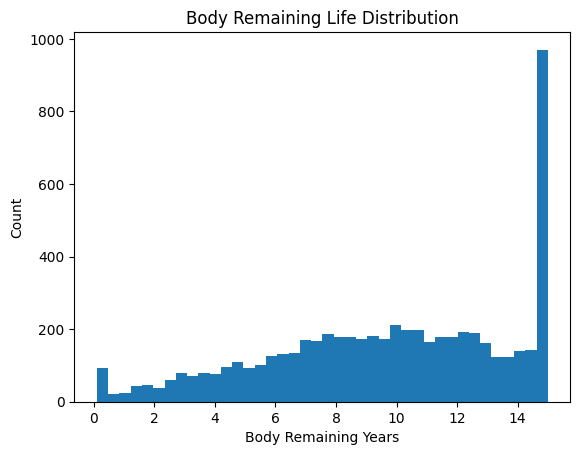

In [109]:
plt.hist(df_body["Body_Remaining_Years"], bins=40)
plt.xlabel("Body Remaining Years")
plt.ylabel("Count")
plt.title("Body Remaining Life Distribution")
plt.show()


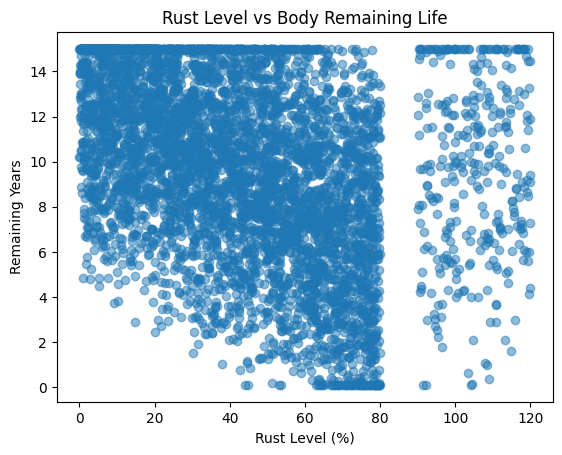

In [110]:
plt.scatter(
    df_body["Rust_Level"],
    df_body["Body_Remaining_Years"],
    alpha=0.5
)
plt.xlabel("Rust Level (%)")
plt.ylabel("Remaining Years")
plt.title("Rust Level vs Body Remaining Life")
plt.show()


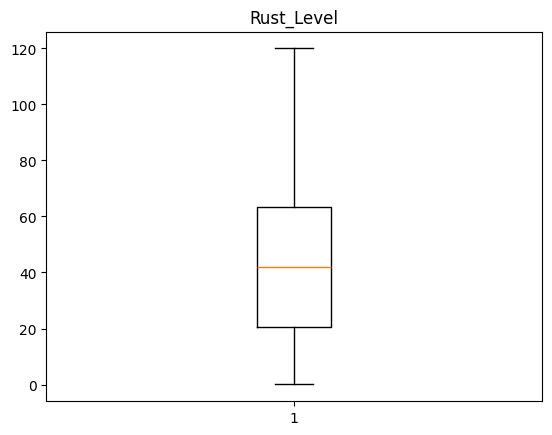

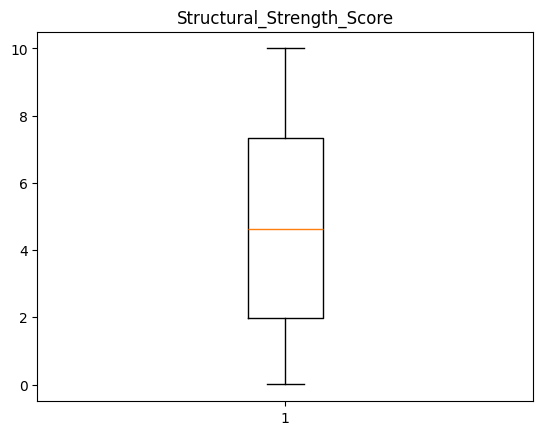

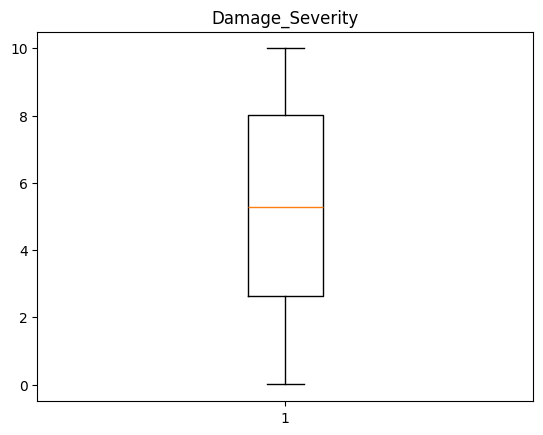

In [111]:
features = [
    "Rust_Level",
    "Structural_Strength_Score",
    "Damage_Severity"
]

for col in features:
    plt.boxplot(df_body[col].dropna())
    plt.title(col)
    plt.show()


In [112]:
x = df_body.drop(
    columns=["Body_Remaining_Years", "Car_ID"]
)
y = df_body["Body_Remaining_Years"]

for col in x.columns:
    x[col] = x[col].fillna(x[col].median())


In [113]:
df_body.loc[df_body["Rust_Level"] > 100, "Rust_Level"] = df_body["Rust_Level"].median()


In [114]:
for col in x.columns:
    lower = x[col].quantile(0.01)
    upper = x[col].quantile(0.99)
    x[col] = x[col].clip(lower, upper)


In [116]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)


In [117]:
model = RandomForestRegressor(
    n_estimators=220,
    max_depth=11,
    min_samples_leaf=6,
    random_state=42
)

model.fit(x_train, y_train)


,n_estimators,220
,criterion,'squared_error'
,max_depth,11
,min_samples_split,2
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [118]:
y_pred = model.predict(x_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2  :", r2_score(y_test, y_pred))


MAE : 1.3203989516783434
RMSE: 1.9752035792154135
R2  : 0.7590103626795174


In [119]:
print("Train R2:", model.score(x_train, y_train))
print("Test R2 :", model.score(x_test, y_test))


Train R2: 0.8596487742936212
Test R2 : 0.7590103626795174
